In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from PIL import Image

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test]*3)
x_test = x_test.reshape(-1, 28,28,3)
x_train = x_train.reshape(-1, 28,28,3)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 3) (10000, 28, 28, 3)


In [ ]:
def reshape_img(data, img_size):
  step = 0
  new_data = []
  for item in range(len(data)):
    image = Image.fromarray(data[step]).resize((img_size, img_size), Image.BILINEAR)
    image = np.asarray(image)
    new_data.append(image)
    step+=1
  new_data = np.array(new_data)
  return new_data

In [ ]:
x_train = reshape_img(x_train, 48)
x_test = reshape_img(x_test, 48)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=[48, 48] + [3])
conv_base.trainable = True

model = Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(128, activation="relu"),
   layers.Dropout(0.5),
   layers.Dense(10, activation="sigmoid"),
])

model.compile(
    optimizer='Adam',
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
set_trainable = False

for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
x_val = x_train[:30000]
partial_x_train = x_train[30000:]

y_val = y_train[:30000]
partial_y_train = y_train[30000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/15
469/469 [==============================] - 53s 87ms/step - loss: 1.4174 - accuracy: 0.4466 - val_loss: 0.8001 - val_accuracy: 0.6923
Epoch 2/15
469/469 [==============================] - 38s 82ms/step - loss: 0.7115 - accuracy: 0.7303 - val_loss: 0.5634 - val_accuracy: 0.7860
Epoch 3/15
469/469 [==============================] - 39s 83ms/step - loss: 0.5879 - accuracy: 0.7882 - val_loss: 0.4896 - val_accuracy: 0.8290
Epoch 4/15
469/469 [==============================] - 39s 82ms/step - loss: 0.4773 - accuracy: 0.8351 - val_loss: 0.4317 - val_accuracy: 0.8508
Epoch 5/15
469/469 [==============================] - 39s 83ms/step - loss: 0.4534 - accuracy: 0.8444 - val_loss: 0.3947 - val_accuracy: 0.8554
Epoch 6/15
469/469 [==============================] - 39s 83ms/step - loss: 0.4018 - accuracy: 0.8633 - val_loss: 0.3775 - val_accuracy: 0.8666
Epoch 7/15
469/469 [==============================] - 39s 83ms/step - loss: 0.6537 - accuracy: 0.7909 - val_loss: 0.4417 - val_accuracy:

In [ ]:
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.3473 - accuracy: 0.8807


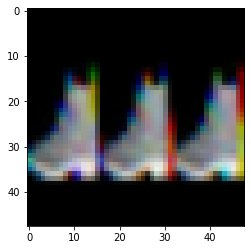

In [ ]:
plt.imshow(x_test[0].reshape(48, 48, 3), cmap=plt.cm.binary)
plt.show()

In [ ]:
image = x_test[0]
image = (np.expand_dims(image,0))
image.shape

(1, 48, 48, 3)

In [ ]:
predictions = model.predict(image)
predictions

array([[2.2185899e-10, 3.9814001e-08, 2.1213595e-13, 4.9191958e-06,
        1.3237873e-11, 3.8051215e-01, 8.2959639e-10, 9.9270028e-01,
        4.0189693e-15, 9.9999988e-01]], dtype=float32)

In [ ]:
prediction = predictions[0]
np.argmax(prediction)

9

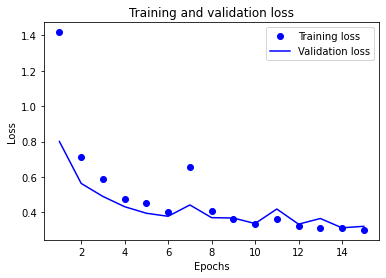

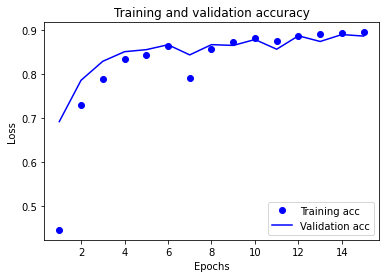

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()